In [1]:
# Make imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Set font settings
plt.rcParams['text.usetex'] = True
sns.set(font_scale = 1.72)

In [2]:
# Get all data over restarts on all AML datasets
dolphyinReal = pd.read_csv("summary/Dolphyin-real.csv")
print(dolphyinReal)

     Unnamed: 0  AMLID  num-cells  num-chars  Rep  Completed   Time    FNRate
0             0      1      10401          4    0  completed  1.005  0.281594
1             1      1      10401          4    1  completed  1.066 -1.000000
2             2      1      10401          4    2  completed  0.862  0.034052
3             3      1      10401          4    3  completed  1.111  0.301387
4             4      1      10401          4    4  completed  0.877  0.022918
..          ...    ...        ...        ...  ...        ...    ...       ...
490         490    116       1466          3    0  completed  0.082  0.012183
491         491    116       1466          3    1  completed  0.082  0.094902
492         492    116       1466          3    2  completed  0.095  0.084642
493         493    116       1466          3    3  completed  0.086  0.005450
494         494    116       1466          3    4  completed  0.083  0.000641

[495 rows x 8 columns]


In [3]:
# Summarize over restarts; filter to cases with output solution (error corr. is probabilistic) 
dolphyinReal = dolphyinReal[dolphyinReal["FNRate"] >= 0]
dolphyinRealSum = dolphyinReal.loc[dolphyinReal.groupby("AMLID")["FNRate"].idxmin()]
print("Number of characters in data (avg)")
print(dolphyinRealSum["num-chars"].mean())
print("Number of cells in data (avg)")
print(dolphyinRealSum["num-cells"].mean())
print("Number of datasets")
print(len(dolphyinRealSum))

Number of characters in data (avg)
4.424242424242424
Number of cells in data (avg)
5460.49494949495
Number of datasets
99


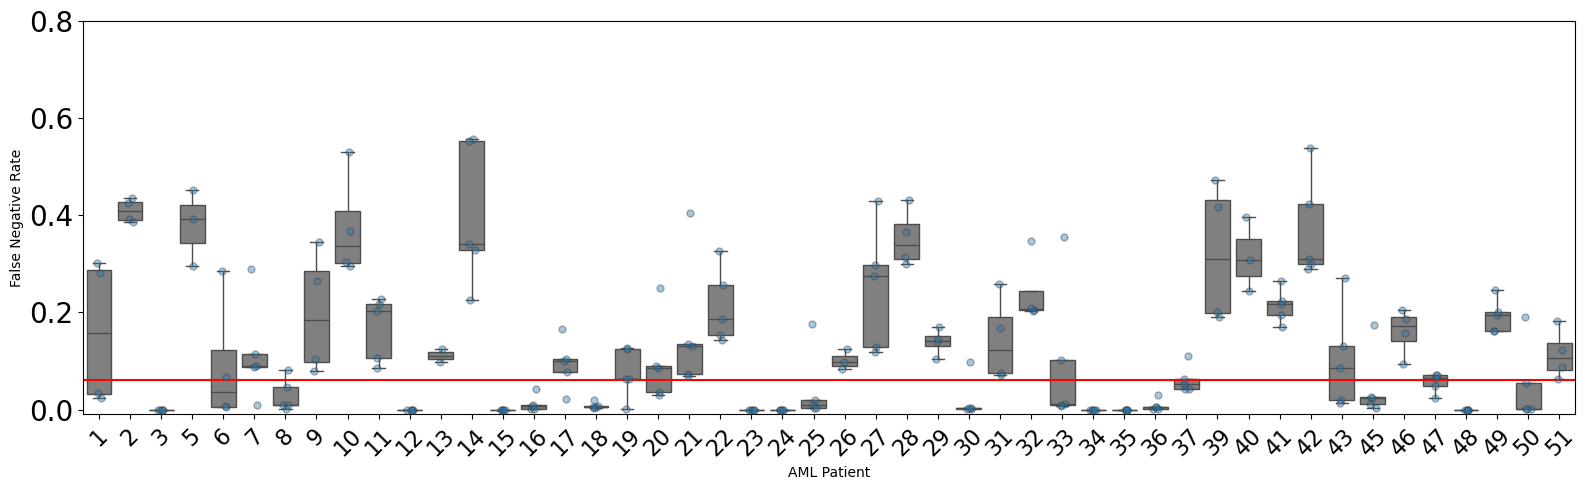

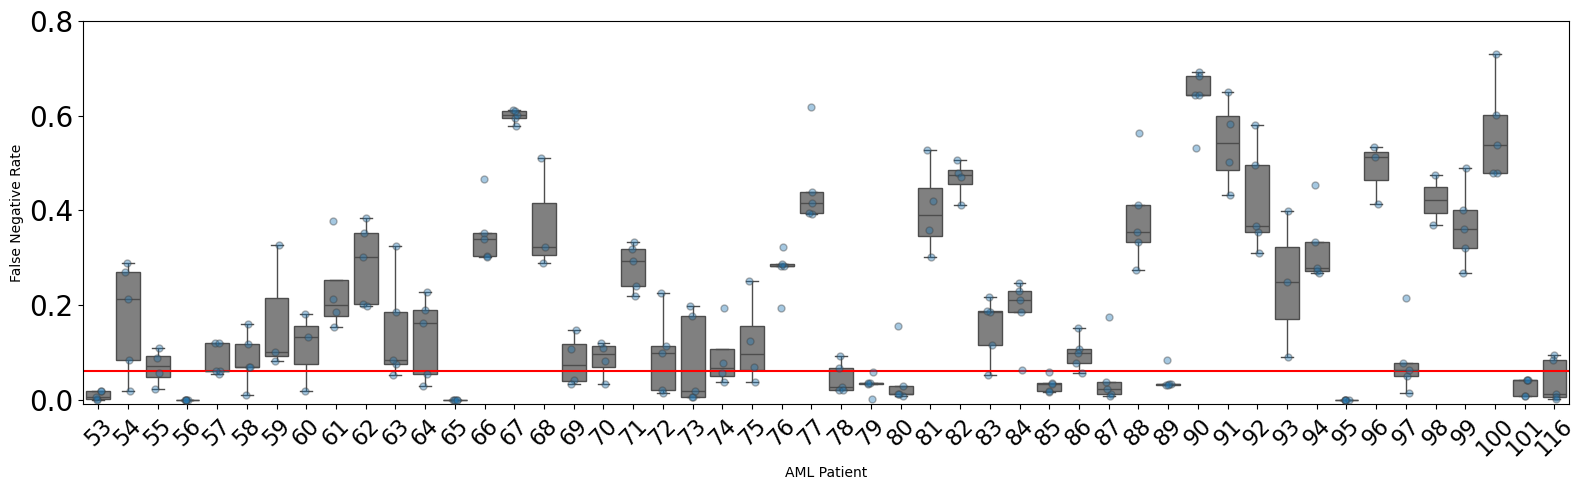

In [4]:
# Make summaries of datasets' results over restarts
def makeRestarts(low, high, output):

    runtimeDims = (16, 5)
    fig, ax = plt.subplots(figsize = runtimeDims)
    datasetFiltered = dolphyinReal[(dolphyinReal["AMLID"] > low) & (dolphyinReal["AMLID"] <= high)]
    line = sns.stripplot(datasetFiltered, x = "AMLID", y = "FNRate", alpha = 0.4, linewidth = 1, jitter = 0.1, dodge = True)    
    sns.boxplot(datasetFiltered, x = "AMLID", y = "FNRate", showfliers = False, color = "gray")

    # Polish figure
    ax.set_xlabel("")    
    ax.set_ylim(-0.01, 0.8)
    ax.tick_params(axis = "x", labelsize = 16, rotation=45)
    ax.tick_params(axis = "y", labelsize = 20)
    ax.set_ylabel("False Negative Rate")
    ax.set_xlabel("AML Patient")
    ax.axhline(y = 0.06, color = "red")
    plt.tight_layout()

    # Examine figure
    # plt.savefig(output)
    plt.show()

makeRestarts(0, 51, "AML-data-restarts1.pdf")
makeRestarts(52, 120, "AML-data-restarts2.pdf")

Category counts
55 14 17 13


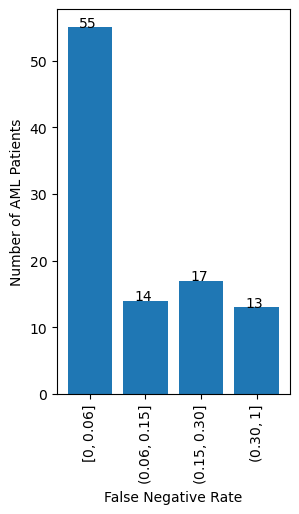

In [5]:
# Make summary of inferred error rates
plt.figure(figsize = (3, 5))
numBelow06 = len(dolphyinRealSum[dolphyinRealSum["FNRate"] <= 0.06])
numBelow015 = len(dolphyinRealSum[(dolphyinRealSum["FNRate"] > 0.06) & (dolphyinRealSum["FNRate"] <= 0.15)])
numBelow030 = len(dolphyinRealSum[(dolphyinRealSum["FNRate"] > 0.15) & (dolphyinRealSum["FNRate"] <= 0.30)])
numBelow100 = len(dolphyinRealSum[(dolphyinRealSum["FNRate"] > 0.30) & (dolphyinRealSum["FNRate"] <= 1.0)])

print("Category counts")
print(numBelow06, numBelow015, numBelow030, numBelow100)

plt.bar([r"$[0,0.06]$", r"$(0.06,0.15]$", r"$(0.15, 0.30]$", r"$(0.30,1]$"], 
        [numBelow06, numBelow015, numBelow030, numBelow100])
plt.text(0 - 0.2, numBelow06 + 0.1, numBelow06)
plt.text(1 - 0.2, numBelow015 + 0.1, numBelow015)
plt.text(2 - 0.2, numBelow030 + 0.1, numBelow030)
plt.text(3 - 0.2, numBelow100 + 0.1, numBelow100)
plt.xticks(rotation=90)
plt.ylabel("Number of AML Patients")
plt.xlabel("False Negative Rate")

# plt.savefig("AML-lowest-error.pdf", bbox_inches = 'tight')
plt.show()